Aim: Identify the grouping of motor neurons as recruited by MDN vs different DNs 
or without prior on the input.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import specific_neurons.mdn_helper as mdn_helper
import specific_neurons.motor_neurons_helper as mns_helper

## Data loading

In [3]:
full_VNC = mdn_helper.get_vnc_split_MDNs_by_neuropil(
    not_connected=mdn_helper.get_mdn_bodyids()
)
VNC = full_VNC.get_connections_with_only_traced_neurons()
motor_neurons = mns_helper.get_leg_motor_neurons(VNC, leg="h", side="RHS")

Loaded VNC Connections object with MDNs split by neuropil.
Attribute status:string not found in the graph. Adding it.
Attribute class:string not found in the graph. Adding it.


## Baseline for motor primitives: no DN input bias

In [4]:
# Get the motor neuron clusters in t3 when there is no specific input.

# Restricting
cmatrix_agnostic = VNC.get_cmatrix(type_="unnorm")
premotor_neurons_agnostic = cmatrix_agnostic.list_upstream_neurons(motor_neurons)
nodes = list(set(motor_neurons).union(premotor_neurons_agnostic))
cmatrix_agnostic.restrict_nodes(nodes)

# Clustering
(
    clustered_cmatrix_agnostic, # clustered similarity matrix as cmatrix object
    uid_clusters_agnostic, # list of lists of uids in each cluster
    index_clusters_agnostic, # list of lists of indices in each cluster matching the clustered cmatrix
) = cmatrix_agnostic.detect_clusters(
    distance="cosine",
    method="hierarchical",
    cutoff=0.5,
    cluster_size_cutoff=2,
    cluster_data_type="uid",
    cluster_on_subset = motor_neurons,
)

/home/hurtak/vnc_networks/vnc_networks/cmatrix.py:657: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = sch.linkage(matrix_, method="ward")
/home/hurtak/miniconda3/envs/vnc/lib/python3.12/site-packages/numpy/matrixlib/defmatrix.py:446: RuntimeWarning: Mean of empty slice.
  return N.ndarray.mean(self, axis, dtype, out, keepdims=True)._collapse(axis)
/home/hurtak/miniconda3/envs/vnc/lib/python3.12/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


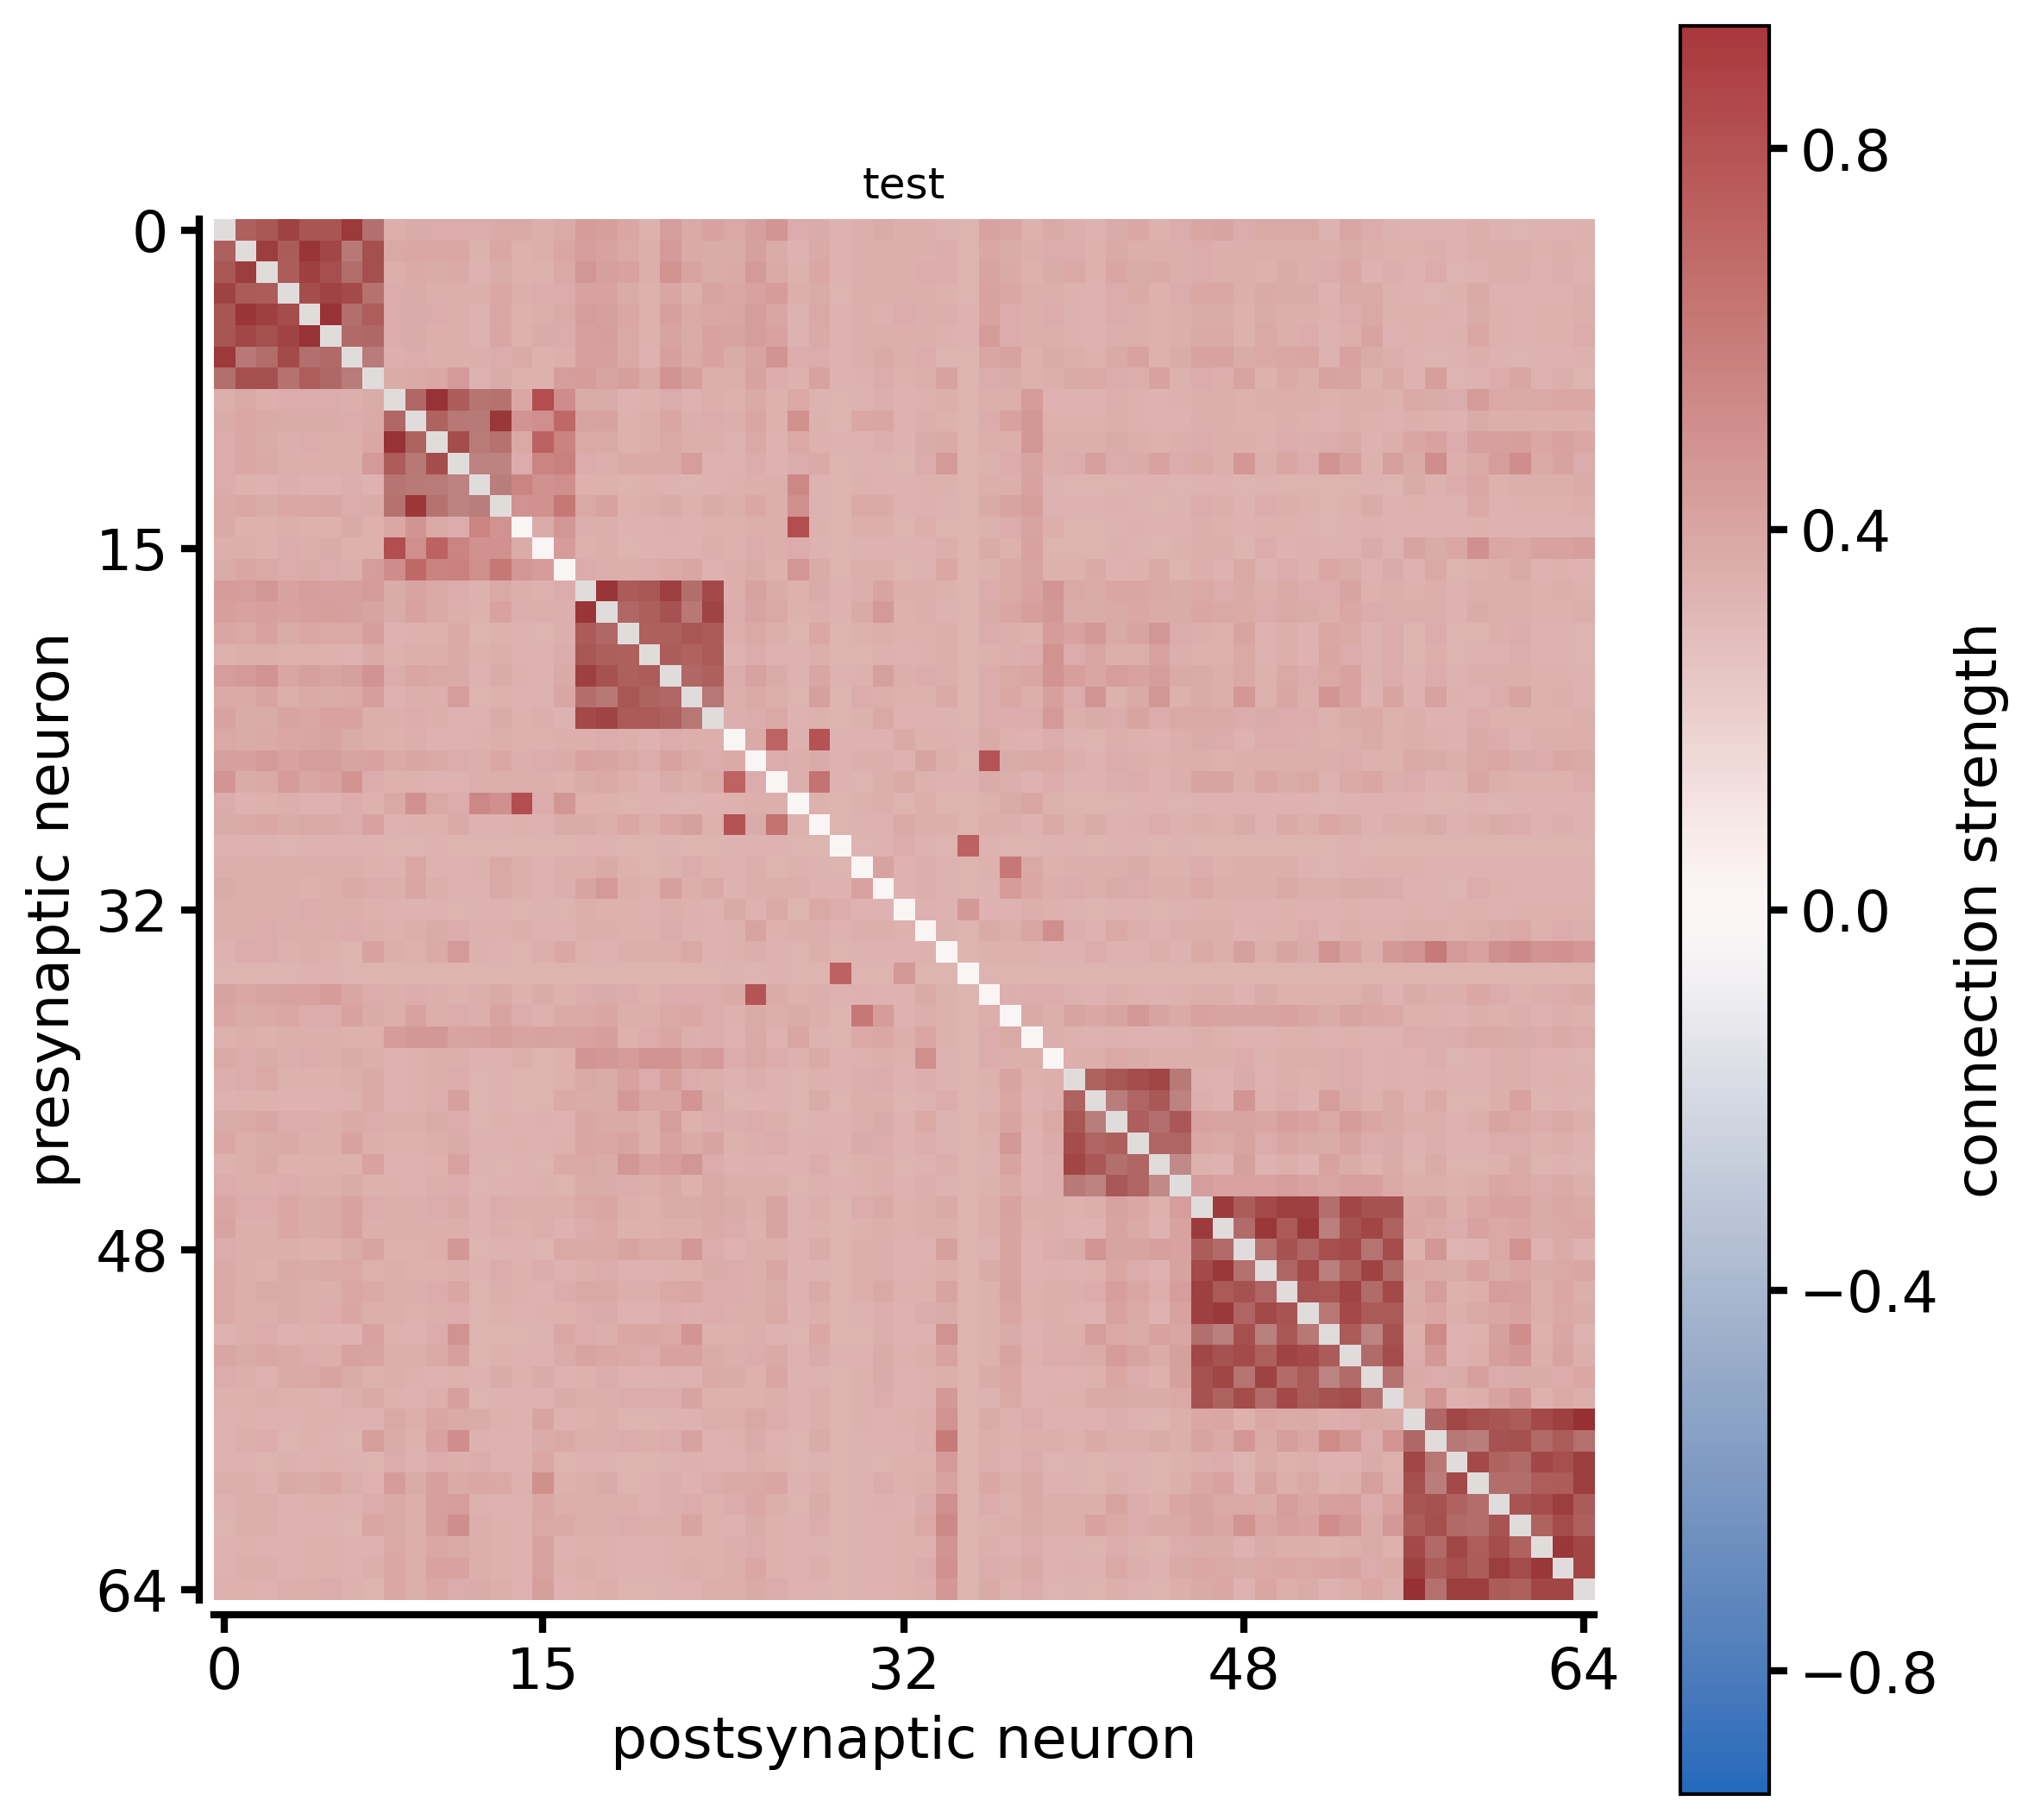

In [6]:
# visualise data
clustered_mat = clustered_cmatrix_agnostic.get_matrix().todense()
# create a matrix of zeros
mat = np.zeros((clustered_mat.shape[0], clustered_mat.shape[1]))
# draw the boundaries between clusters
for cluster in index_clusters_agnostic:
    mat[cluster[0] : cluster[-1] + 1, cluster[0] : cluster[-1] + 1] = 1
ax, title = clustered_cmatrix_agnostic.imshow(savefig=False)
ax.imshow(mat, cmap="binary", alpha=0.1)
plt.show()


Visualise and compare the motor neuron clusters yielded by the premotor
neurons from circuits in t3 restricted to a DN input in the list or
agnostic of the input.